In [123]:
import os 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from anytree import Node, RenderTree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


def print_anytree(anytree):
    for pre, fill, node in RenderTree(anytree):
        print(f"{pre}{node.name}")
        
def scan_neighbours_schedule_from_anytree_graph(anytree, G):
    """
    Scan recursively through the tree, starting from the root
    """
    order = []

    def scan_children(node):
        if len(node.children) > 0:
            children = node.children
            for c in children:
                order.append([node.name, c.name])
                if len(c.children) > 0:
                    scan_children(c)
        else:
            pass

    scan_children(anytree)

    print_anytree(anytree)

    scan_neighbours_schedule = []
    visited = []
    starting_node = order[0][0]
    for i in order:
        start, end = tuple(i)
        if start == starting_node:
            previous = starting_node
        else:
            previous = [x for x in visited if x[1] == start][0][0]
        visited.append(i)
        neighbours = [x for x in G.edges(start) if x[1] != end]
        schedule = [tuple(x) for x in order if x[0] == end]
        scan_neighbours_schedule.append(((previous, start, end), neighbours, schedule))

    return scan_neighbours_schedule

In [141]:
def get_result(outfile):
    outlines = open(outfile).readlines()
    fun = [x for x in outlines if x.__contains__("fun:")]

    try:
        fun = float(fun[0].split()[1])
    except Exception as e:
        # print(fun)
        # print(outfile, e)
        return None
    return fun
    
output_files = [x for x in os.listdir("output") if x.endswith(".out")]
rmsd_results = {}

for file in output_files:
    ind = int(file.split(".")[0])
    rmsd_results[ind] = get_result(f"output/{file}")
    
# rmsd_results
    
    

In [124]:
order_path = "/home/unibas/boittier/fdcm_project/mdcms/methanol/anytree.obj"
order = pd.read_pickle(order_path)
order

Node('/674')

867


(array([ 51., 217., 274., 187.,  74.,  37.,  11.,  11.,   1.,   4.]),
 array([0.35644325, 0.37287756, 0.38931188, 0.40574619, 0.4221805 ,
        0.43861482, 0.45504913, 0.47148344, 0.48791776, 0.50435207,
        0.52078638]),
 <BarContainer object of 10 artists>)

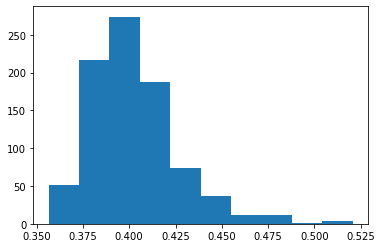

In [142]:
rmsd_list = [x for x in list(rmsd_results.values()) if x is not None]
print(len(rmsd_list))
plt.hist(rmsd_list)

In [146]:
graph_path = "/home/unibas/boittier/fdcm_project/mdcms/methanol/H.obj"
G = pd.read_pickle(graph_path)

print(len(G.nodes))

# pos=nx.spring_layout(G)


# viridis = cm.get_cmap('viridis', len(rmsd_list))
# print(viridis)

# for key,n in G.nodes.items():
#     if key in rmsd_results.keys():
#         n["rmsd"] = rmsd_results[key]
#     else:
#         n["rmsd"] = None
        
# colors = [G.nodes[n]['rmsd'] for n in G.nodes]


# FIGSIZE = 20
# plt.figure(3,figsize=(FIGSIZE,FIGSIZE)) 

# nx.draw_networkx_edges(G, pos, alpha=0.1)
# nx.draw_networkx_nodes(G, pos, alpha=0.75, node_size=150, label=True, node_color=colors)

1706


In [132]:
from os.path import exists 
for node in G.nodes:
    file_exists = exists(f"/data/unibas/boittier/graphscan/methanol/t3/p{node}.p.cube")
    if not file_exists:
        print(node, file_exists)

In [126]:
scan_neighbours_schedule = scan_neighbours_schedule_from_anytree_graph(order, G)

674
├── 570
│   ├── 649
│   │   ├── 5
│   │   │   ├── 375
│   │   │   │   ├── 1029
│   │   │   │   │   ├── 432
│   │   │   │   │   │   └── 139
│   │   │   │   │   │       ├── 1310
│   │   │   │   │   │       │   └── 1193
│   │   │   │   │   │       │       ├── 346
│   │   │   │   │   │       │       │   ├── 1663
│   │   │   │   │   │       │       │   │   └── 2158
│   │   │   │   │   │       │       │   │       ├── 754
│   │   │   │   │   │       │       │   │       │   └── 966
│   │   │   │   │   │       │       │   │       │       ├── 1710
│   │   │   │   │   │       │       │   │       │       │   ├── 861
│   │   │   │   │   │       │       │   │       │       │   │   ├── 1535
│   │   │   │   │   │       │       │   │       │       │   │   │   ├── 1087
│   │   │   │   │   │       │       │   │       │       │   │   │   │   └── 1017
│   │   │   │   │   │       │       │   │       │       │   │   │   │       ├── 959
│   │   │   │   │   │       │       │   │       │       │   │   │   │

In [127]:
# -l pickles/1886_clcl.obj

job_template = """#!/bin/bash
#SBATCH --job-name={s}_{e}
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --partition=vshort
#SBATCH --output=/home/unibas/boittier/fdcm_python/logs/{s}_{e}.log

cd /home/unibas/boittier/fdcm_python

python fdcm_python.py {f} -n {n} {l} > output/{s}_{e}.out

"""

In [145]:
#  list to keep track of jobs so a file isn't overwritten.
jobs_submitted = []
#  Process the schedule for job writing
first = scan_neighbours_schedule[0][0][0]

for i, (scan, neighbours, schedule) in enumerate(scan_neighbours_schedule):
    # print(i, scan, neighbours, schedule)
    print()
    print("Current:", scan)
    previous, start, end = scan
    is_first = (start == first)
    
    neighbours = [x[1] for x in neighbours]
    neighbours_str = "" #f"{start}"
    # for neighb in neighbours:
    #     neighbours_str += f" {neighb}"
    neighbours_str += f" {end}"
    
    if is_first:
        __f__ = "-f True"
        __l__ = ""
    else:
        __f__ = ""
        __l__ = f"-l pickles/{start}_clcl.obj"      
        
    print(neighbours_str)
    
    tmp_str = job_template.format(f=__f__, l=__l__, n=neighbours_str, s=start, e=end)
    
    f = open(os.path.join("jobs", f"p{start}_{end}.sh"), "w")
    
    jobs_submitted.append(os.path.join("", f"p{start}_{end}.sh"))
    print(os.path.join("jobs", f"p{start}_{end}.sh"))
    f.write(tmp_str)

    #  schedule the jobs preceding this one (i.e. all branches from this node)
    for job in schedule:
        print("\tNext:", job)
        next_job = os.path.join("jobs", f"p{job[0]}_{job[1]}.sh")
        f.write(f"\nsbatch {next_job} \n")
        print("\t\t", next_job)
    
    #  close the file to be safe
    f.close()



Current: (674, 674, 570)
 570
jobs/p674_570.sh
	Next: (570, 649)
		 jobs/p570_649.sh
	Next: (570, 147)
		 jobs/p570_147.sh
	Next: (570, 1151)
		 jobs/p570_1151.sh
	Next: (570, 1577)
		 jobs/p570_1577.sh

Current: (674, 570, 649)
 649
jobs/p570_649.sh
	Next: (649, 5)
		 jobs/p649_5.sh
	Next: (649, 277)
		 jobs/p649_277.sh
	Next: (649, 193)
		 jobs/p649_193.sh
	Next: (649, 494)
		 jobs/p649_494.sh
	Next: (649, 86)
		 jobs/p649_86.sh

Current: (570, 649, 5)
 5
jobs/p649_5.sh
	Next: (5, 375)
		 jobs/p5_375.sh
	Next: (5, 722)
		 jobs/p5_722.sh
	Next: (5, 465)
		 jobs/p5_465.sh

Current: (649, 5, 375)
 375
jobs/p5_375.sh
	Next: (375, 1029)
		 jobs/p375_1029.sh
	Next: (375, 1333)
		 jobs/p375_1333.sh
	Next: (375, 471)
		 jobs/p375_471.sh
	Next: (375, 502)
		 jobs/p375_502.sh

Current: (5, 375, 1029)
 1029
jobs/p375_1029.sh
	Next: (1029, 432)
		 jobs/p1029_432.sh
	Next: (1029, 242)
		 jobs/p1029_242.sh

Current: (375, 1029, 432)
 432
jobs/p1029_432.sh
	Next: (432, 139)
		 jobs/p432_139.sh

Cu

In [21]:
degree_dict = {}
for n,d in G.degree():
    if d not in degree_dict.keys():
        degree_dict[d] = []
    degree_dict[d].append(n)
deg = degree_dict.keys()
deg = list(deg)
print(min(deg), max(deg))

1 10


[1, 335, 1481, 1864, 1906, 2081, 2418]


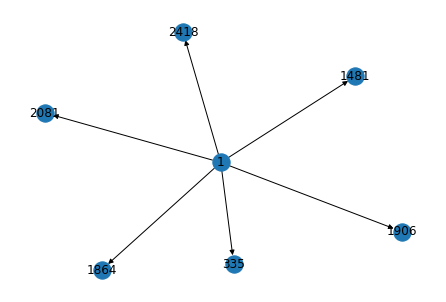

In [17]:
H = nx.dfs_tree(G, source=1, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

[2418, 1, 1058, 1520, 2004, 2384]


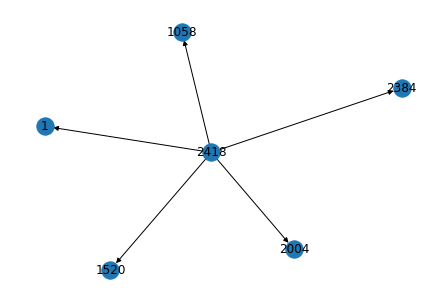

In [18]:
H = nx.dfs_tree(G, source=2418, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

[1058, 412, 670, 1520, 1886, 2418]


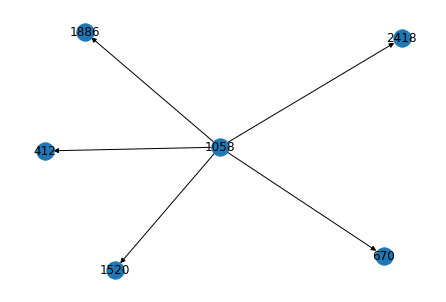

In [32]:
H = nx.dfs_tree(G, source=1058, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

[1886, 72, 412, 462, 567, 660, 1058, 1653, 1712, 1862]


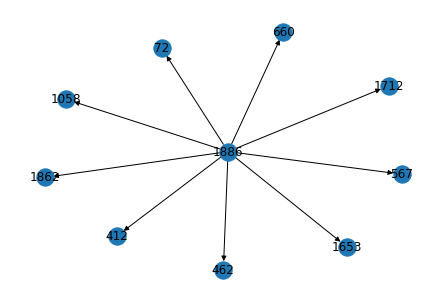

In [34]:
H = nx.dfs_tree(G, source=1886, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

In [39]:
len(scan_neighbours_schedule)

1775